In [3]:
# Data processing
import numpy as np
import pandas as pd
import geopandas as gpd
from datetime import datetime
import simpledbf as sdbf

# Visualisation
import matplotlib
import matplotlib.pyplot as plt
from ipyleaflet import Map, GeoData, basemaps, LayersControl
import seaborn as sns
import folium
import mapclassify

#API Handling
import simplejson
import urllib.request as ur
import routingpy as rp
import googlemaps
KEY = ""

In [2]:
subzones_all_stats = gpd.read_file('Generated Files\subzones_all_stats_with_API_results.shp')

In [13]:
list(subzones_all_stats)

['OBJECTID',
 'SUBZONE_NO',
 'SUBZONE_N',
 'SUBZONE_C',
 'CA_IND',
 'PLN_AREA_N',
 'PLN_AREA_C',
 'REGION_N',
 'REGION_C',
 'INC_CRC',
 'FMEL_UPD_D',
 'X_ADDR',
 'Y_ADDR',
 'SHAPE_Leng',
 'SHAPE_Area',
 'busstop_no',
 'mrtsg_no',
 'schools_no',
 'malls_no',
 'supermarke',
 'hawkercent',
 'no_hdbs',
 'realprice_',
 'realpric_1',
 'realpric_2',
 'normprice_',
 'normpric_1',
 'normpric_2',
 'mallsavg_d',
 'activesgav',
 'schoolsavg',
 'parksavg_d',
 'hawkersavg',
 'geometry']

In [14]:
subzones_all_stats.head()

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,...,realpric_2,normprice_,normpric_1,normpric_2,mallsavg_d,activesgav,schoolsavg,parksavg_d,hawkersavg,geometry
0,5,3,PASIR RIS TOWN,PRSZ03,N,PASIR RIS,PR,EAST REGION,ER,37EABA55C9A79089,...,545046.872727,0.107525,0.610823,0.373232,2920.541667,3569.166667,3414.863636,3389.342857,3392.368421,"POLYGON ((41290.234 39671.558, 41291.480 39656..."
1,6,2,MACPHERSON,GLSZ02,N,GEYLANG,GL,CENTRAL REGION,CR,732CC6D2DCC784CF,...,334619.777778,0.012258,0.556293,0.165889,2368.333333,2955.111111,2965.136364,3127.714286,2636.157895,"POLYGON ((34415.029 33909.481, 34357.250 33893..."
2,7,5,GEYLANG EAST,GLSZ05,N,GEYLANG,GL,CENTRAL REGION,CR,84A21DC72BA5355B,...,507847.861111,0.061160,0.604379,0.336579,2448.500000,2967.722222,3199.000000,3259.542857,2775.263158,"POLYGON ((35987.194 33319.391, 36001.551 33245..."
3,8,4,ALJUNIED,GLSZ04,N,GEYLANG,GL,CENTRAL REGION,CR,EA9A22F6E41806C7,...,507801.058824,0.041692,0.662598,0.336533,2199.375000,2677.833333,2948.863636,3076.685714,2531.842105,"POLYGON ((34277.234 32322.636, 34282.432 32306..."
4,11,3,ROSYTH,HGSZ03,N,HOUGANG,HG,NORTH-EAST REGION,NER,A460D2B9939CA6EE,...,395733.666667,0.140281,0.497220,0.226107,2622.166667,2977.000000,3096.090909,3255.257143,2827.789474,"POLYGON ((33948.238 38873.199, 34088.871 38837..."


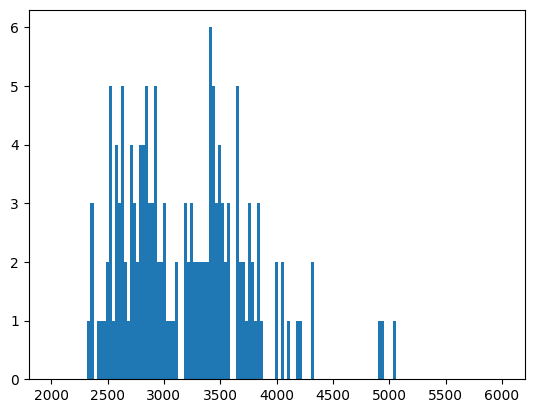

In [30]:
bins = np.linspace(2000, 6000, 150, endpoint=True)
plt.hist(subzones_all_stats.hawkersavg, bins = bins)
plt.show()


In [41]:
subzones_all_stats.hawkersavg.mean(axis=0)

3192.505054025793

In [36]:
print(subzones_all_stats.hawkercent.corr(subzones_all_stats.hawkersavg))
print(subzones_all_stats.malls_no.corr(subzones_all_stats.mallsavg_d))
print(subzones_all_stats.schools_no.corr(subzones_all_stats.schoolsavg))


-0.17762699718540223
-0.039512047721474604
0.14116188153617046


In [12]:
mall = subzones_all_stats.loc[:,["mallsavg_d", "malls_no"]]
school = subzones_all_stats.loc[:,["schoolsavg", "schools_no"]]
hawker = subzones_all_stats.loc[:,["hawkersavg", "hawkercent"]]


<AxesSubplot: xlabel='mallsavg_d', ylabel='malls_no'>

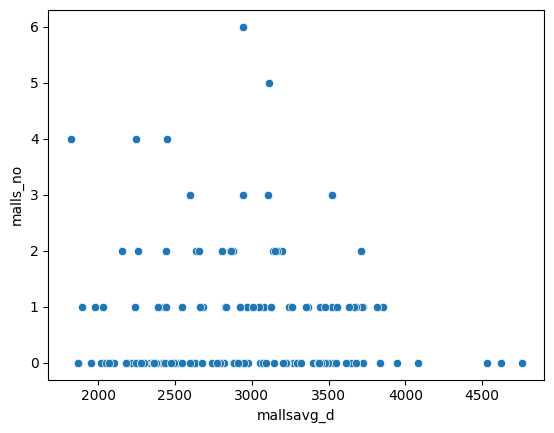

In [14]:
sns.scatterplot(x="mallsavg_d", y="malls_no", data=mall)

<AxesSubplot: xlabel='schoolsavg', ylabel='schools_no'>

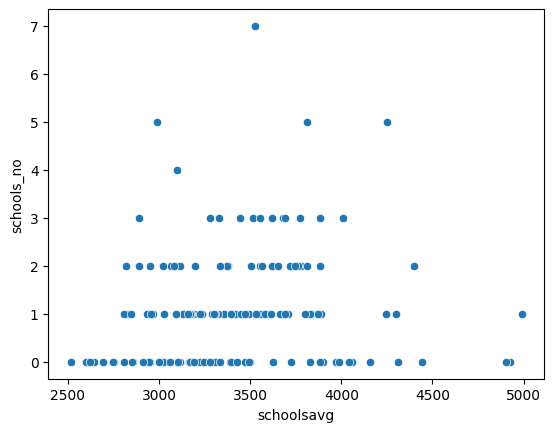

In [16]:
sns.scatterplot(x="schoolsavg", y="schools_no", data=school)

<AxesSubplot: xlabel='hawkersavg', ylabel='hawkercent'>

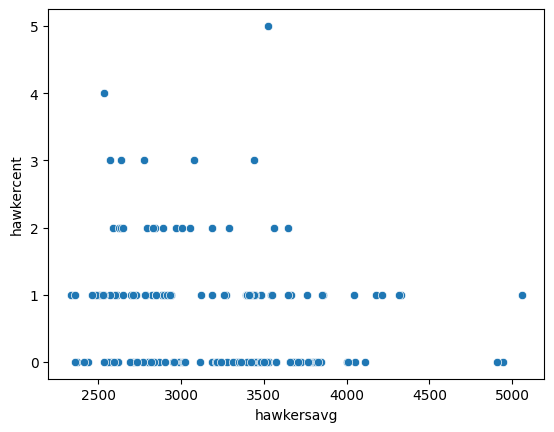

In [17]:
sns.scatterplot(x="hawkersavg", y="hawkercent", data=hawker)

In [118]:
hc = pd.read_csv(r"Proxy Storage\hawker_duration.csv", index_col = 0, header = 0)
sc = pd.read_csv(r"Proxy Storage\schools_duration.csv", index_col = 0, header = 0)
hc = pd.read_csv(r"Proxy Storage\hawker_duration.csv", index_col = 0, header = 0)
hc = pd.read_csv(r"Proxy Storage\hawker_duration.csv", index_col = 0, header = 0)

In [115]:
def desc(df):
    df = df.min(axis=1)
    df = df.astype(int)   
    df = df.div(60)
    print(s.describe())

In [111]:
s = hc.min(axis=1)

C:\Users\seanm\AppData\Local\Temp\ipykernel_2636\1099437329.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  s = hc.min(axis=1)


In [112]:
s

0      1763.0
1       339.0
2        18.0
3       937.0
4      1337.0
        ...  
146    1742.0
147    1962.0
148    3432.0
149    1157.0
150    1465.0
Length: 151, dtype: float64

In [113]:
s = s.astype(int)
s = s.div(60)

In [114]:
s.unique()

array([29.38333333,  5.65      ,  0.3       , 15.61666667, 22.28333333,
        9.71666667, 30.18333333, 53.15      , 20.21666667, 29.1       ,
       32.06666667, 27.08333333, 11.65      , 30.11666667, 21.33333333,
        7.76666667, 25.98333333, 27.2       , 30.3       , 32.6       ,
        8.96666667, 32.25      , 20.16666667, 24.43333333, 15.06666667,
       15.3       , 18.03333333,  8.38333333,  2.45      , 45.85      ,
       40.38333333, 39.03333333, 25.16666667, 14.81666667, 26.16666667,
       21.18333333,  4.1       , 24.03333333, 22.83333333, 12.5       ,
       23.33333333,  4.11666667, 42.76666667, 39.7       , 36.65      ,
       17.9       , 22.18333333, 18.18333333, 11.95      , 19.56666667,
        3.76666667, 21.46666667, 15.        , 18.21666667, 21.9       ,
       26.3       , 33.45      , 29.18333333, 15.1       , 21.91666667,
       13.66666667, 23.88333333, 10.76666667, 22.06666667, 35.16666667,
        2.41666667, 34.03333333, 14.35      , 26.75      ,  0.96

In [108]:
s.describe(exclude=[np.NaN])

count    20.000000
mean      5.577500
std       4.875749
min       0.000000
25%       2.237500
50%       4.108333
75%       8.254167
max      16.083333
dtype: float64

In [119]:
desc(sc)

count    151.000000
mean      23.354746
std       11.153253
min        0.116667
25%       15.916667
50%       23.316667
75%       30.058333
max       57.200000
dtype: float64


C:\Users\seanm\AppData\Local\Temp\ipykernel_2636\3844672880.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.min(axis=1)
